In [28]:
# import sys
# !{sys.executable} -m pip install sklearn

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample


In [14]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#NOT SPAM:  2788
#SPAM:  1813


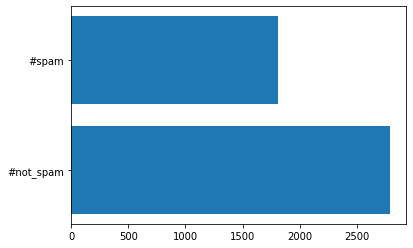

In [32]:
not_spam_count, spam_count = dataset['label_spam'].value_counts()
plt.barh(["#not_spam","#spam"], [not_spam_count, spam_count])
print("#NOT SPAM:  "+str(not_spam_count))
print("#SPAM:  "+ str(spam_count))

#NOT SPAM:  1813
#SPAM:  1813


<BarContainer object of 2 artists>

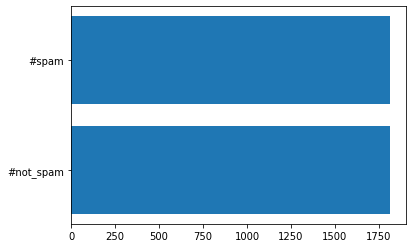

In [49]:
#Solving unbalanced dataset 
#1 undersampling

not_spam_data = dataset[dataset.label_spam == 0]
spam_data = dataset[dataset.label_spam == 1]

undersampled_data = resample(not_spam_data, replace = False, n_samples = 1813, random_state = 123)
undersampled_data.head()
balanced_dataset = pd.concat([undersampled_data, spam_data])
undersampled_not_spam, undersampled_spam = balanced_dataset.label_spam.value_counts()
print("#NOT SPAM:  "+str(undersampled_not_spam))
print("#SPAM:  "+ str(undersampled_spam))
plt.barh(["#not_spam","#spam"], [undersampled_not_spam, undersampled_spam])

#NOT SPAM:  2788
#SPAM:  2788


<BarContainer object of 2 artists>

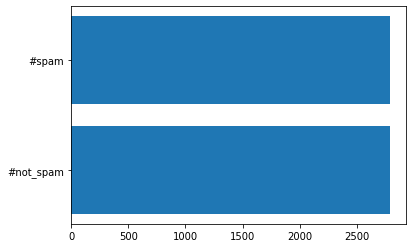

In [51]:
#2 oversampling
df_majority = dataset[dataset.label_spam==0]
df_minority = dataset[dataset.label_spam==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2788,    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
oversampled_not_spam, oversampled_spam = df_upsampled.label_spam.value_counts()
print("#NOT SPAM:  "+str(oversampled_not_spam))
print("#SPAM:  "+ str(oversampled_spam))
plt.barh(["#not_spam","#spam"], [oversampled_not_spam, oversampled_spam])